<a href="https://colab.research.google.com/github/Thanos2002/CNNClassifier--MNIST-dataset/blob/main/CnnGithub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- In this example, we are using Google Collab, that already has pytorch and scipy installed.
In any other case it might be necessary to install them.
However, if you encounter an issue such as a missing package try installing the libraries manualy (e.g `!pip install torchvision`.)

In [ ]:
import scipy
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.autograd import Variable

- The following code downloads the MNIST dataset from `torchvision.datasets` ,  into the `mnist` folder located in the root path.       

In [ ]:
import torch
import torchvision.datasets as datasets
from google.colab import drive

# import additional libs in case not already done in 'askisi 1'
import matplotlib.pyplot as plt
import numpy as np

# Define the dataset directory
path = './mnist/'
# Load the MNIST training dataset
train_dataset = datasets.MNIST(root=path, train=True, download=True)

# Extract the images and labels from the training dataset
X_train = train_dataset.data.numpy()
y_train = train_dataset.targets.numpy()

# Load the MNIST testing dataset
test_dataset = datasets.MNIST(root=path, train=False, download=True)

# Extract the images and labels from the testing dataset
X_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).



KeyboardInterrupt: 

- Below, we display one random example image for each label (category) from the training data, corresponding to the categories, in order to examine the data that we are working with.

In [ ]:
def plot_mnist_sample_high_res(X_train, y_train):
    """
    This function plots a sample image for each category,
    The result is a figure with 2x5 grid of images.

    """
    """ ==========
    YOUR CODE HERE
    ========== """

    plt.figure()

    for i in range(10):
        plt.subplot(2, 5, i+1)
        image = X_train[i]
        plt.title(f"Train: {y_train[i]} ")
        plt.imshow(image, cmap="gray")
        plt.axis("off")
        plt.tight_layout()

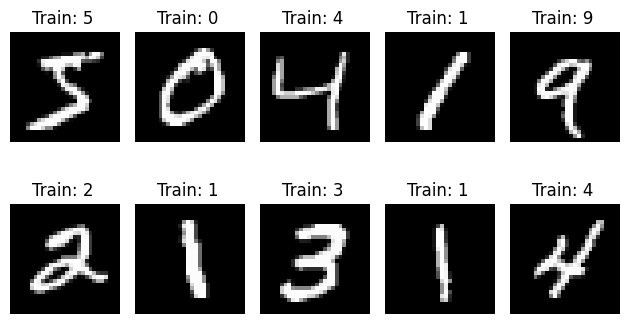

In [ ]:
# PLOT CODE
plot_mnist_sample_high_res(X_train, y_train)

- This code defines a base class for our deep neural network (`DNN`) in PyTorch. It provides a foundation for building and training custom neural networks by implementing a training loop (`train_net`). The class includes methods for initializing the network, performing forward passes, and training the network using stochastic gradient descent and cross-entropy loss.

In [ ]:
# base class for your deep neural networks. It implements the training loop (train_net).


import torch.nn.init
import torch.optim as optim
from torch.autograd import Variable
from torch.nn.parameter import Parameter
from tqdm import tqdm
from scipy.stats import truncnorm

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        pass

    def forward(self, x):
        raise NotImplementedError

    def train_net(self, X_train, y_train, epochs=1, batchSize=50):

        # criterion selection, i.e, loss function
        criterion = nn.CrossEntropyLoss()
        # optimizer selection, using `optim.`
        optimizer = optim.SGD(self.parameters(),lr=0.01)
        losses = []
        # For each epoch
        for epoch in range(epochs):
          sum_loss = 0.0
          # For each batch
          for i in tqdm(range(0, len(X_train), batchSize)):
          #for i , batch in enumerate(X_train,0):
              # Assign inputs and labels using PyTorch's autograd package via Variable
              inputs = Variable(torch.FloatTensor(X_train[i:i+batchSize]))
              labels = Variable(torch.LongTensor(y_train[i:i+batchSize]))
              # Forward pass
              optimizer.zero_grad()
              outputs = self.forward(inputs)
              # Compute loss
              loss = criterion(outputs, labels)
              # Backward pass
              loss.backward()
              # Weight update
              optimizer.step()
              # Final loss
              losses.append(loss.item())
              sum_loss += loss.item()

          print(f"Epoch {epoch + 1}, Loss: {sum_loss / (len(X_train) // batchSize)}")

    def __call__(self, x):
        inputs = Variable(torch.FloatTensor(x))
        prediction = self.forward(inputs)
        return np.argmax(prediction.data.cpu().numpy(), 1)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sn

# Defining a Convolutional Neural Network
class CNNClassifier(DNN):
    def __init__(self, classes=10, n=10):
        super(CNNClassifier, self).__init__()
        """
        Initialization of the CNN layers using torch.nn.Conv2d and torch.nn.Linear
        """
        # First Convolutional Layer: Input Channels = 1, Output Channels = n, Kernel Size = 5x5
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=n, kernel_size=5, stride=2, padding=2)

        # Second Convolutional Layer: Input Channels = n, Output Channels = 2*n, Kernel Size = 5x5
        self.conv2 = nn.Conv2d(in_channels=n, out_channels=2*n, kernel_size=5, stride=2, padding=2)

        # Fully Connected Layers
        self.fc1 = nn.Linear(2 * n * 7 * 7, 64)  # Flattened input size from second conv layer to 64 neurons
        self.fc2 = nn.Linear(64, classes)        # From 64 neurons to number of classes (e.g., 10 for MNIST)

    def forward(self, x):
        """
        Forward pass of the CNNClassifier
        """
        # Reshape input to match the expected dimensions for Conv2d: (batch_size, channels, height, width)
        x = x.view(x.size(0), 1, 28, 28)

        # Apply first convolutional layer followed by ReLU activation
        x = F.relu(self.conv1(x))  # Output: (batch_size, n, 14, 14)

        # Apply second convolutional layer followed by ReLU activation
        x = F.relu(self.conv2(x))  # Output: (batch_size, 2*n, 7, 7)

        # Flatten the output of the second convolutional layer
        x = x.view(x.size(0), -1)

        # Apply the first fully connected layer followed by ReLU activation
        x = F.relu(self.fc1(x))    # Output: (batch_size, 64)

        # Apply the second fully connected layer for the final output
        x = self.fc2(x)            # Output: (batch_size, number of classes)

        return x

# Instantiate and train the model
cnnClassifier = CNNClassifier()
cnnClassifier.train_net(X_train, y_train, epochs=5, batchSize=50)


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to calculate and display the confusion matrix
def print_confusion_matrix(model, X_test, y_test):
    """
    Prints the confusion matrix for the given model and test data.
    """
    # Get predictions from the model
    predictions = model(X_test)  # Forward pass
    predicted_labels = torch.argmax(predictions, dim=1).cpu().numpy()  # Get the predicted class indices

    # Convert true labels to numpy for comparison
    true_labels = y_test.cpu().numpy()

    # Calculate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    sn.heatmap(df_cm, annot=True)
    plt.title("Confusion Matrix")
    plt.show()

# Assuming X_test and y_test are your test dataset
print_confusion_matrix(cnnClassifier, X_test, y_test)
